In [12]:
import pandas as pd 
import numpy as np

insurance_data = pd.read_csv('/Users/baffoebonnieja/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/DATASCIENCE/datasets/insurance.csv')

insurance_data.isnull().sum()

# target var: charges


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.DataFrame(insurance_data)
X = df[df.columns[:-1]]  #all but last 
y = df[df.columns[-1]]   #last

X_encoded = pd.get_dummies(X)
#has to be train, test, train, test ...(data, y....
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = .2, random_state = 42)  

#X_encoded
#X_train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #no fit Test

model = LinearRegression()
model.fit(X_train_scaled, y_train)  #training
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_pred,y _test)
mse


33802288.53383915

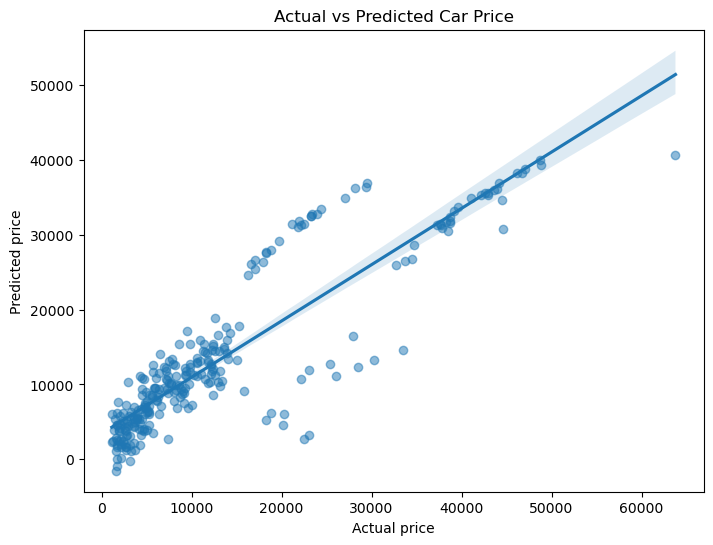

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual charge")
plt.ylabel("Predicted charge")
plt.title("Actual vs Predicted Insurance Charge")
plt.show()

In [110]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7822701144863763

In [82]:
coef_df = pd.DataFrame({'Feature': X_encoded.columns, 
                        'Coefficient': model.coef_
                       }).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
6,smoker_yes,2.111186e+17
5,smoker_no,2.111186e+17
3,sex_female,1.900893e+16
4,sex_male,1.900893e+16
9,region_southeast,1.415000e+14
7,region_northeast,1.388319e+14
10,region_southwest,1.383074e+14
8,region_northwest,1.368700e+14
0,age,3.609449e+03
1,bmi,2.038938e+03


In [114]:
# ========== NEW DATA PREDICTION ==========

# Start with a sample input (must match the shape of X_encoded)

sample_input = X_train.iloc[0].copy() #copy first row of training set for manipulation
sample_input['age'] = 190
sample_input['bmi'] = 56


sample_input_scaled = scaler.transform([sample_input])  #no fit 
predicted_price = model.predict(sample_input_scaled)

print(f"Predicted charge: ${predicted_price[0]:,.2f}")



Predicted charge: $56,226.39


/Users/baffoebonnieja/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Same preprocessing steps up to here...

# Replace linear model with decision tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)  # NOTE: no scaling needed for trees!

# Predict
y_tree_pred = tree_model.predict(X_test)

# Evaluate
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print("Decision Tree MSE:", mse_tree)
print("Decision Tree R²:", r2_tree)
